# Predicting cab booking cancellation
## Capstone Project One : Springboard Data Science career track
### Notebook by Debisree Ray


## Introduction:

### 1. The Problem:

The business problem addressed here is to improve the customer service for Bangalore (India) based cab company called YourCabs. The problem is that a certain percentage of booking gets canceled by the company due to the unavailability of a car, and the cancellations occur at a time when the trip is about to start. Therefore it causes passengers inconvenience and a bad reputation for the company. So, the challenge is to build a predictive model, which would classify the upcoming bookings as, if they would eventually get cancelled due to car unavailability, or not. So this is a classification problem.


### 2. The Data: 

The Kaggle hosts the original problem and the dataset in their website as one of their competitions. Here, I downloaded the data from the Kaggle website. Following are the data fields in the dataset, which we are going to read in the Pandas data frame.


* id - booking ID<br />
* user_id - the ID of the customer (based on mobile number)<br />
* vehicle_model_id - vehicle model type.<br />
* package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)<br />
* travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).<br />
* from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages <br />
* to_area_id - unique identifier of area. Applicable only for point-to-point travel <br />
* from_city_id - unique identifier of city <br />
* to_city_id - unique identifier of city (only for intercity) <br />
* from_date - time stamp of requested trip start <br />
* to_date - time stamp of trip end <br />
* online_booking - if booking was done on desktop website <br />
* mobile_site_booking - if booking was done on mobile website <br />
* booking_created - time stamp of booking <br />
* from_lat - latitude of from area <br />
* from_long - longitude of from area <br />
* to_lat - latitude of to area <br />
* to_long - longitude of to area <br />
* Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car. <br />
* Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units. <br />



### 3. The questions of interest:

This data analysis and story-telling report is organized around the following questions of interest:

* How many unique users are out there? Are there any returning customers? Did they (returning customers) got their rides canceled?
* What are the different package IDs out there? Is there any relationship with the cancellations?
* What are the different travel types, vehicle IDs and mode of bookings (mobile/website/phone)? How are they related with the cancellations?
* Is there any connection between the drop-off location/city/area ID/latitude-longitude info and cancellations? What about the same with the pick-up locations/city/area IDs
* In which areas/neighborhoods, the cab service is the most popular?
* what is the busiest hour in a day? Does that have any connection with the cancellation?
* Which day of the week is the most popular in the cab users? Is there any connection between the day of the week with the cancellations?


### 4. Executive summary:


### 5. Import the necessary libraries and the data:



To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe.

In [2]:
#os.getcwd()
#os.chdir ('Springboard_Debisree/predicting-cab-booking-cancellations/')

import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [4]:
#convert from_date column, to_date column and booking_created column to date-time
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp)


df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1.0


In [5]:
## Let's split the dataframe in another group (for which the car_cancellation =1):

df1 = df[df['Car_Cancellation'] > 0]
#df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 21 to 43422
Data columns (total 20 columns):
id                     3132 non-null int64
user_id                3132 non-null int64
vehicle_model_id       3132 non-null int64
package_id             336 non-null float64
travel_type_id         3132 non-null int64
from_area_id           3130 non-null float64
to_area_id             2775 non-null float64
from_city_id           1691 non-null float64
to_city_id             21 non-null float64
from_date              3132 non-null datetime64[ns]
to_date                2135 non-null datetime64[ns]
online_booking         3132 non-null int64
mobile_site_booking    3132 non-null int64
booking_created        3132 non-null datetime64[ns]
from_lat               3130 non-null float64
from_long              3130 non-null float64
to_lat                 2775 non-null float64
to_long                2775 non-null float64
Car_Cancellation       3132 non-null int64
Cost_of_error          3132 non-

So, df1 is another dataframe for the canceled ('Car_cancellation' = 1) bookings. Total no of entries are 3132.


In [6]:
#Booking time:

time=df.booking_created.value_counts()
t=df.booking_created
t_can=df1.booking_created
time_can= df1.booking_created.value_counts()
#print(time_can)

max=time.values.max()
min=time.values.min()



#t=time.loc[time.values == max]

print('Maximum booking created at a given timestamp:'+ str(max))
print('And the corresponding date-time is: 2013-10-31 10:30:00')
print('Minimum booking created at a given timestamp:'+str(min))

import datetime

df['booking_dayofweek'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df['booking_date'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df['booking_month'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df['booking_time'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time

df1['booking_dayofweek_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df1['booking_date_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df1['booking_month_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df1['booking_time_can'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time


booking_dayofweek=df.booking_dayofweek.value_counts()
booking_date=df.booking_date.value_counts()
booking_m=df.booking_month.value_counts()
booking_t=df.booking_time.value_counts()

booking_dayofweek_can=df1.booking_dayofweek_can.value_counts()
booking_date_can=df1.booking_date_can.value_counts()
booking_m_can=df1.booking_month_can.value_counts()
booking_t_can=df1.booking_time_can.value_counts()

Maximum booking created at a given timestamp:18
And the corresponding date-time is: 2013-10-31 10:30:00
Minimum booking created at a given timestamp:1


In [7]:
date=df.from_date.value_counts()
date_can=df1.from_date.value_counts()
#print(date_can)
d=df.from_date
d_can=df1.from_date
max_d=date.values.max()
min_d=date.values.min()

In [8]:
#Splitting the trip starting time info into two seperate columns, date and time:
#To see if that has any connection with the cancellations:

#pd.__version__
import datetime

df['dayofweek'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df['date'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df['month'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df['time'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time

df1['dayofweek_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df1['date_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df1['month_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df1['time_can'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time


weekday=df.dayofweek.value_counts()
date=df.date.value_counts()
month=df.month.value_counts()
t=df.time.value_counts()

weekday_can=df1.dayofweek_can.value_counts()
date_can=df1.date_can.value_counts()
month_can=df1.month_can.value_counts()
t_can=df1.time_can.value_counts()
#print(month_can)

In [9]:
#Inspect if the time difference between the time of 
#booking and the time of trip strat has any impact on the cancellation:


import datetime as dt
end= df['from_date']
start=df['booking_created']
diff = (end - start) 
df['time_difference']= diff/np.timedelta64(1,'h')
#print(difference)

end_can= df1['from_date']
start_can=df1['booking_created']
diff_can = (end_can - start_can) 
df1['time_difference_can']= diff_can/np.timedelta64(1,'h')
#print(difference)


td=df.time_difference.value_counts()

td_can=df1.time_difference_can.value_counts()

### Some problem in the dataset:

We can see that in 42 entries of the dataset, the time difference (which is the difference in the datetime entries of ride booking and the actual trip start) is negative! This is unphysical, where you cannot book the ride, which has already initiated. Surprisingly, 41 of them are successful (not canceled.) 

We dropped these entries.



In [10]:
# Numerical values of the time difference:

#average time difference:
m0=np.mean(df['time_difference'])
print(m0)

#print('The average time difference (hrs.) between the booking time and that of the trip start: ' +str(m1))

#average time difference for the canceled bookings:
#m2=np.mean(df1['time_difference_can'])
#print('The average time difference (hrs.) between the booking time and that of the trip start for canceled bookings : ' +str(m2))
#df.head()

df_n = df[df['time_difference'] < 0]
#df_n['Car_Cancellation']
#print(df_n['booking_created'])
#print(df_n['from_date'])
#print(len(df_n))


df_new= df.drop(df[df['time_difference'] < 0].index)
#df_new.head()
#len(df_new)

33.94207478529163


In [11]:
df_new.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error', 'booking_dayofweek', 'booking_date', 'booking_month',
       'booking_time', 'dayofweek', 'date', 'month', 'time',
       'time_difference'],
      dtype='object')

## 6. Data preperation and feature selection:

Following features will be considered for analysis:

* vehicle_model_id
* package_id
* travel_type_id
* from_area_id
* to_area_id
* from_city_id
* to_city_id
* online_booking
* mobile_site_booking
* booking_date
* booking_month
* dayofweek
* date
* month
* time_difference

In [12]:
features_cols = ['vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id','from_city_id', 'to_city_id',
'online_booking', 'mobile_site_booking','booking_dayofweek', 'booking_date', 'booking_month', 'dayofweek', 'date', 'month',
                 'time_difference']

features = df_new[features_cols]
#cat_df = X_df['package_id','from_area_id','to_area_id']
#features = cont_df.join(pd.get_dummies(cat_df))
y = df_new.Car_Cancellation

In [13]:
# Add a new level for the missing values:

features.from_area_id.fillna(0, inplace=True)
features.to_area_id.fillna(0, inplace=True)
features.package_id.fillna(0,inplace=True)
features.from_city_id.fillna(0, inplace=True)
features.to_city_id.fillna(0,inplace=True)

In [14]:
#features
X= features

### 7. Applying the Machine Learning models:

This is a classification problem, in supervised learning. Here we have used the following classification models:
* Logistic Regression 
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Random Forest 
* Naive Bayes
* Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

In [15]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve

# Splitting the dataset into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling:

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

### 7.a Logistic Regression:



In [16]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.928478
1,0.010,0.928478
2,0.100,0.928401
3,1.000,0.928478
4,10.000,0.928478
5,100.000,0.928478


In [59]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_test_lr=Logreg.score(X_test,y_test)
Accuracy_train_lr=Logreg.score(X_train,y_train)
print(Accuracy_test_lr)
print(Accuracy_train_lr)

[[12086     0]
 [  931     0]]
0.9284781439655835
0.9275648623732385


In [58]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_test_lr= cv_scores_test.mean()
cv_scores_train_lr= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_test_lr))
print ('Mean cross validation train score: ' +str(cv_scores_train_lr))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.78382718 0.76390353 0.74170192 0.75757738 0.74635534]
Mean cross validation test score: 0.7586730702448825
Mean cross validation train score: 0.754213192016379
Standard deviation in cv test scores: 0.01483936470112972


### 7.b K-Nearest neighbor (KNN) :


In [19]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)
print(Accuracy_knn)

#knn_disp= plot_roc_curve(knn,X_test,y_test)

[[12049    37]
 [  868    63]]
0.9304755319966198


In [21]:
from sklearn.cross_validation import cross_val_score

cv_scores= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
print(cv_scores)
cv_scores_knn= cv_scores.mean()
cv_scores_std_knn= cv_scores.std()
print ('Mean cross validation score: ' +str(cv_scores_knn))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.77676008 0.76580538 0.7481571  0.75355791 0.77128183]
Mean cross validation score: 0.7631124591233608
Standard deviation in cv scores: 0.010725674013744932


### 7.c Support Vector Machine (SVM):

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[12086     0]
 [  931     0]]
0.9284781439655835


In [23]:
from sklearn.cross_validation import cross_val_score

cv_scores= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
print(cv_scores)
cv_scores_svm= cv_scores.mean()
cv_scores_std_svm= cv_scores.std()
print ('Mean cross validation score: ' +str(cv_scores_svm))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.67507508 0.65942629 0.70208781 0.62774211 0.58460457]
Mean cross validation score: 0.6497871726185717
Standard deviation in cv scores: 0.04050309571752817


### 7.d Random Forest:


In [24]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[11954   132]
 [  671   260]]
0.9383114388876085


In [25]:
from sklearn.cross_validation import cross_val_score

cv_scores= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
print(cv_scores)
cv_scores_rf= cv_scores.mean()
cv_scores_std_rf= cv_scores.std()
print ('Mean cross validation score: ' +str(cv_scores_rf))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.8601277  0.8563791  0.83426869 0.85051005 0.85645695]
Mean cross validation score: 0.8515484971943377
Standard deviation in cv scores: 0.009172790783014969


### 7.e Gradient Boosting :

In [26]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[11925   161]
 [  613   318]]
0.9405392947683798


In [27]:
from sklearn.cross_validation import cross_val_score

cv_scores= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
print(cv_scores)
cv_scores_gbc= cv_scores.mean()
cv_scores_std_gbc= cv_scores.std()
print ('Mean cross validation score: ' +str(cv_scores_gbc))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.89496335 0.86654121 0.85349518 0.87468914 0.8709366 ]
Mean cross validation score: 0.8721250975063508
Standard deviation in cv scores: 0.013474616413305928


### 7.f Naive Bayes:

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[10616  1470]
 [  600   331]]
0.8409771836828762


In [29]:
from sklearn.cross_validation import cross_val_score

cv_scores= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
print(cv_scores)
cv_scores_nb= cv_scores.mean()
cv_scores_std_nb= cv_scores.std()
print ('Mean cross validation score: ' +str(cv_scores_nb))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.72880535 0.719289   0.70657662 0.69964988 0.6814455 ]
Mean cross validation score: 0.7071532695681377
Standard deviation in cv scores: 0.016331634692073195


### 8.Comparison of the models:


In [30]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score= [  cv_scores_lr,cv_scores_knn,cv_scores_svm,cv_scores_rf,cv_scores_gbc,cv_scores_nb]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab = pd.DataFrame(list(zip(myLabels, score,Accuracy_score)), 
               columns =['Algorithm', 'ROC-AUC score','Model accuracy score']) 
score_tab

,Algorithm,ROC-AUC score,Model accuracy score
0,Logistic Regression,0.758673,0.928478
1,KNN,0.763112,0.930476
2,SVM,0.649787,0.928478
3,Random Forest,0.851548,0.938311
4,Gradient Boost,0.872125,0.940539
5,Naive Bayes,0.707153,0.840977


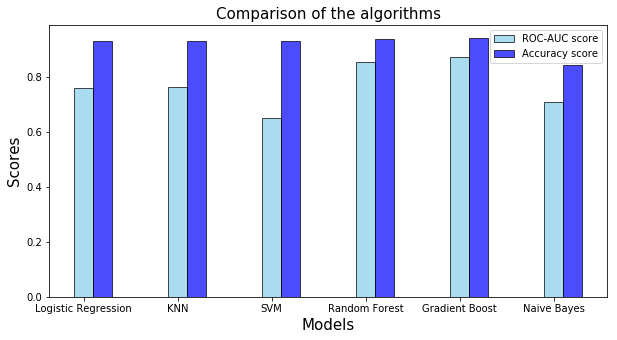

In [47]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score,color='skyblue',alpha=0.7,label='ROC-AUC score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,Accuracy_score,color='b',alpha=0.7,label='Accuracy score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.show()

Here we have tabulated and plotted the model evaluation scores for different ML algorithms. Clearly, Gradient Boost, and the Random Forest are the two best performing models. So, we will perform a grid search/ hyperparameter tuning for those two ML models.

### 9. Applying Grid search CV for Parameter Tuning:
### 9.a Parameter Tuning for Random Forest:

In [34]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
0.9386276833925985


###  Fitting the Random forest model with the optimal hyperparameters:


In [36]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.9392333102865483
0.8593893236572302


### ROC-AUC Score and the ROC curve:

In [38]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores = rf.predict_proba(X_test)
y_scores = y_scores[:,1]
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.8743806692921994


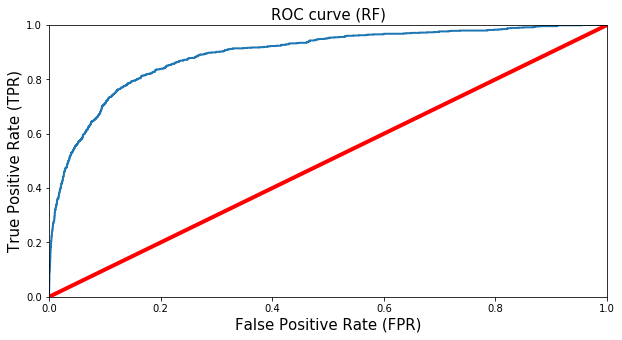

In [53]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### 9.b Parameter Tuning for Gradient Boost:

In [46]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)

print(gsGB.best_estimator_)
print(gsGB.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  7.6min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.9405702620834979


### Fitting the Gradient Boost model with the optimal hyperparameters:

In [48]:
GB= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
GB.fit(X_train, y_train)
y_predictions = GB.predict(X_test)
acc = accuracy_score(y_test, y_predictions)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.941077053084428
0.8593893236572302


### ROC-AUC Score and the ROC curve:

In [51]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores = GB.predict_proba(X_test)
y_scores = y_scores[:,1]
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.893297950794103


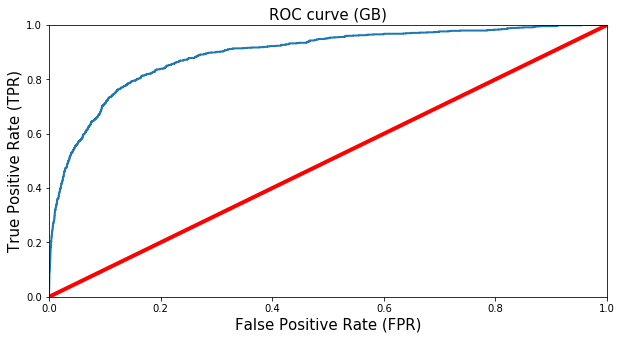

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()